### Importancia de variables

En este notebook estudiamos los métodos para obtener la importancia de las variables en un modelo de Machine Learning. Obtener la importancia de las variables es importante para entender el problema y buscar posibles fallos, pues una persona experta en el problema que queremos resolver nos puede indicar si estas importancias tienen sentido. Calcular las importancias también nos puede ayudar a seleccionar las variables más importantes y, con ello, reducir el tamaño de nuestro problema de Machine Learning, lo que puede resultar en modelos que sean computacionalmente menos costosos o que incluso ofrezcan mejores performances.

1. Importamos Pandas, Numpy y Matplotlib

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

2. Cargamos el Breast Cancer Dataset, que podemos obtener en este enlace

https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset

In [2]:
df = pd.read_csv('breast-cancer.csv')

In [3]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


3. Transformamos la variable objetivo de forma que valga 0 (benigno) ó 1 (maligno)

In [4]:
df['diagnosis'] = df['diagnosis'].apply(lambda x: 1 if x=='M' else 0)

In [5]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


4. Comprobamos que no hay valores faltantes en el dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    int64  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [7]:
df.describe()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


5. Quitamos la variable 'id'

In [8]:
df.drop('id', axis=1, inplace=True)

In [9]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


5. Definimos el dataframe X (avriables predictoras) y la serie y (variable objetivo)

In [10]:
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

6. Obtenemos el conjunto de entrenamiento y el conjunto de test

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=19)

7. Importamos las funciones necesarias para hacer un pipeline con un StandarScaler y una regresión logística

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

8. Definimos el pipeline y lo entrenamos. Obtenemos los coeficientes de la regresión logística, que serán nuestras importancias de variables. En este caso estamos aplicando regresión logística sin regularización, por lo que todas las variables tendrán un coeficiente asociado distinto de cero (aunque pueda ser muy pequeño). En las celdas siguientes veremos cómo aplicar regularización L1.

In [14]:
pipeline = Pipeline([('scaler', StandardScaler()),
                     ('model', LogisticRegression(random_state=8))])

pipeline.fit(X_train, y_train)

coefficients = pipeline.named_steps['model'].coef_[0]

var_names = X_train.columns
feature_importances = pd.DataFrame({'coeffs':coefficients}, index=var_names)

9. Representamos los coeficientes en un gráfico de barras

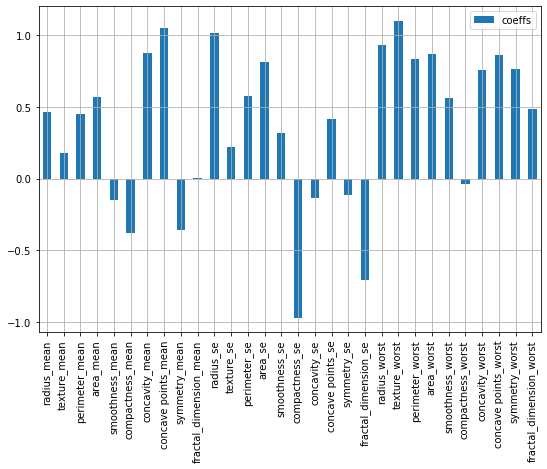

In [15]:
feature_importances.plot(kind='bar', figsize=(9,6), grid=True)

10. Para saber qué coeficiente de regularización debemos usar, hacemos un Grid Search para ver qué valor nos da mejor métrica sobre el conjunto de validación.

Importamos GridSearchCV

In [16]:
from sklearn.model_selection import GridSearchCV

11. Definimos el rango de valores del coeficiente de regularización sobre el que se va a buscar la mejor solución.

**Nota 1**: En realidad, definimos el rango de valores de $C$. $C$ es el inverso del coeficiente de regularización, $C=1/\alpha$, de forma que cuanto más pequeño sea $C$, más peso le estamos dando a la regularización.

**Nota 2**: El nombre del parámetro no es 'C' sino 'model__C' (con dos guines bajos) porque vamos a meter el model dentro de un pipeline y pipeline necesita saber a qué step pertenece el parámetro 'C'.

In [17]:
parameters = {'model__C':np.linspace(0.05, 1.5, 25)}

12. Definimos una regresión logística. Si añadimos regularización L1 (LASSO), debemos cambiar el solver para que el modelo pueda funcionar).

In [18]:
model = LogisticRegression(penalty='l1', solver='liblinear', max_iter=200, random_state=8)

13. Definimos un Standard scaler

In [19]:
scaler = StandardScaler()

14. Definimos el pipeline que queremos utilizar

In [20]:
pipeline = Pipeline([('scaler', scaler),
                     ('model', model)])

15. Definimos el GridSearchCV. Sus inputs son el pipeline que hemos definido y la lista de parámetros.

In [21]:
gridsearch = GridSearchCV(pipeline, parameters)

16. Entrenamos el GridSearchCV sobre el conjunto de entrenamiento

In [22]:
gridsearch.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model',
                                        LogisticRegression(max_iter=200,
                                                           penalty='l1',
                                                           random_state=8,
                                                           solver='liblinear'))]),
             param_grid={'model__C': array([0.05      , 0.11041667, 0.17083333, 0.23125   , 0.29166667,
       0.35208333, 0.4125    , 0.47291667, 0.53333333, 0.59375   ,
       0.65416667, 0.71458333, 0.775     , 0.83541667, 0.89583333,
       0.95625   , 1.01666667, 1.07708333, 1.1375    , 1.19791667,
       1.25833333, 1.31875   , 1.37916667, 1.43958333, 1.5       ])})

17. Obtenemos el mejor parámetro 'C' para nuestro problema. Es este caso el valor óptimo de C es 1.0770833

In [23]:
gridsearch.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 LogisticRegression(C=1.0770833333333334, max_iter=200,
                                    penalty='l1', random_state=8,
                                    solver='liblinear'))])

18. Con este valor de 'C' entrenamos un pipeline sobre el conjunto X_train

In [24]:
pipeline = Pipeline([('scaler', StandardScaler()),
                     ('model', LogisticRegression(C=0.23125, 
                                                  penalty='l1', 
                                                  solver='liblinear', 
                                                  max_iter=200,
                                                  random_state=8))])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 LogisticRegression(C=0.23125, max_iter=200, penalty='l1',
                                    random_state=8, solver='liblinear'))])

19. Obtenemos los coeficientes para cada variable, los nombres de cada variable y creamos un DataFrame en el que el índice sea los nombres de las variables y la única columna sea el valor de su coeficiente

In [25]:
coefficients = pipeline.named_steps['model'].coef_[0]

var_names = X_train.columns
feature_importances = pd.DataFrame({'coeffs':coefficients}, index=var_names)

20. Representamos en un gráfico de barras los valores de cada coeficiente. Como hemos aplicado LASSO (regularización L1) vemos que muchos coeficientes resultan ser cero. Si, basado en este modelo, tuviéramos que elegir las variables más relevantes, elegiríamos 'concave_points_mean' y 'area_worst'

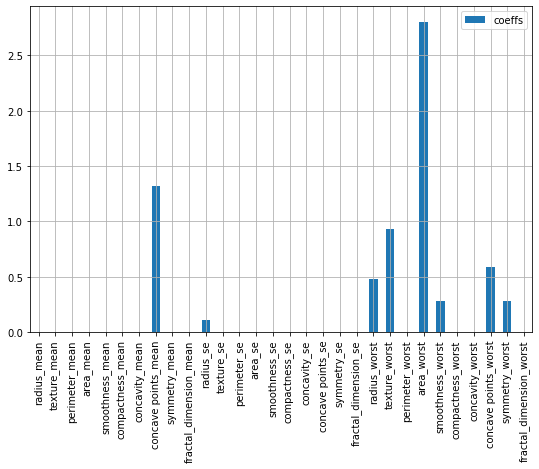

In [26]:
feature_importances.plot(kind='bar', figsize=(9,6), grid=True)